# Setup Package and Dataframe

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import datetime
%matplotlib inline

In [115]:
cust = pd.read_csv('customers.csv')
event = pd.read_csv('events.csv')
offer = pd.read_csv('offers.csv')

# Data Checking

## Customer

In [116]:
cust.sample(5)

,customer_id,became_member_on,gender,age,income
14758,239f99fbeec1414482a02223af0e9702,20151122,F,40,72000.0
12631,66bacac758ea46f7a08baea5a463ee27,20170711,NaN,118,NaN
14110,c4ccd694c25247fc82132a4a883bd1d1,20160827,F,65,79000.0
7064,86ac6c4a83b44cf7b1bdf87ea65e62a4,20160930,M,45,91000.0
10173,b92827d95fb74354b8c0c207e7457e9c,20171221,M,42,54000.0


In [117]:
display(cust.shape)
display(cust.sample(1))
cust.info()

(17000, 5)

,customer_id,became_member_on,gender,age,income
5057,e4762356dd2a488bb6e0733a06469078,20160730,F,19,62000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       17000 non-null  object 
 1   became_member_on  17000 non-null  int64  
 2   gender            14825 non-null  object 
 3   age               17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [118]:
#Chekcing null values
cust.isnull().sum()

customer_id            0
became_member_on       0
gender              2175
age                    0
income              2175
dtype: int64

In [119]:
cust.describe(include='all')

,customer_id,became_member_on,gender,age,income
count,17000,1.700000e+04,14825,17000.000000,14825.000000
unique,17000,NaN,3,NaN,NaN
top,68be06ca386d4c31939f3a4f0e3dd783,NaN,M,NaN,NaN
freq,1,NaN,8484,NaN,NaN
mean,NaN,2.016703e+07,NaN,62.531412,65404.991568
std,NaN,1.167750e+04,NaN,26.738580,21598.299410
min,NaN,2.013073e+07,NaN,18.000000,30000.000000
25%,NaN,2.016053e+07,NaN,45.000000,49000.000000
50%,NaN,2.017080e+07,NaN,58.000000,64000.000000
75%,NaN,2.017123e+07,NaN,73.000000,80000.000000


In [120]:
gender = cust.groupby('gender')['customer_id'].count().reset_index()

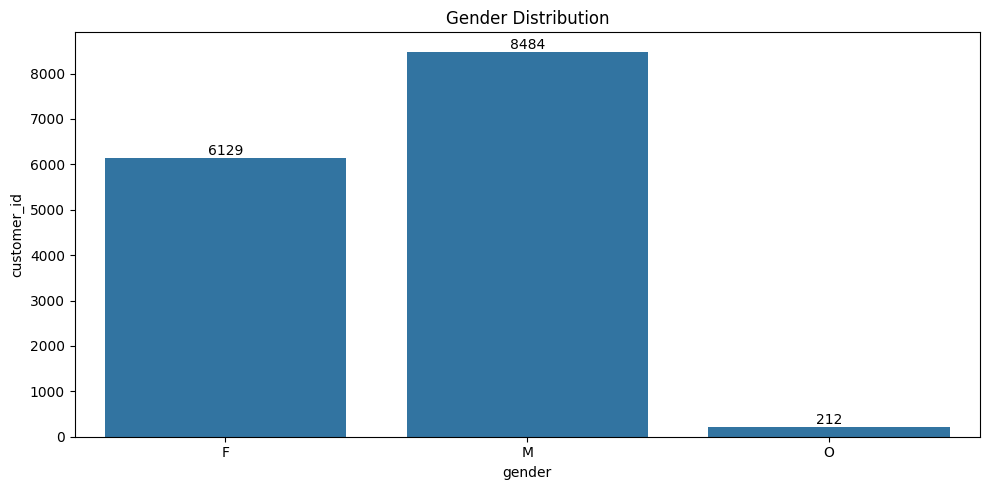

In [121]:
fig = plt.figure(figsize=(10,5))

ax = sns.barplot(data = gender, x='gender', y = 'customer_id')

for i in ax.containers:
    ax.bar_label(i,)
ax.set_title('Gender Distribution')

plt.tight_layout()

> the customer table has 17000 rows, 5 columns with the following summary:

1. became_member_on can be converted into date or datetime data type
2. null value within gender and income column could be removed, as we want to analyze of the distribution later on.
3. customer_id is already unique.
4. there are 3 gender value within the gender column. As shown above, since "other" total data insignificance, we may remove it from the dataset
5. maximum age value a bit odd, can be explore later on.
6. age group can be grouped by and categorized

## Event

In [122]:
display(event.shape)
display(event.sample(3))
event.info()

(306534, 4)

,customer_id,event,value,time
87008,55f61387411147bb99db9fc70fc665c0,transaction,{'amount': 0.2},216
43359,4d6ff24523d74ea1b558312278fadcaf,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,108
259694,e75f049cf8bd494bac2d4bfdc17679cf,transaction,{'amount': 24.69},576


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  306534 non-null  object
 1   event        306534 non-null  object
 2   value        306534 non-null  object
 3   time         306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [123]:
event.describe(include='all')

,customer_id,event,value,time
count,306534,306534,306534,306534.000000
unique,17000,4,5121,NaN
top,94de646f7b6041228ca7dec82adb97d2,transaction,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},NaN
freq,51,138953,14983,NaN
mean,NaN,NaN,NaN,366.382940
std,NaN,NaN,NaN,200.326314
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,186.000000
50%,NaN,NaN,NaN,408.000000
75%,NaN,NaN,NaN,528.000000


In [124]:
event.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

> the event table has 306.534 rows and 4 columns with the following summary:

1. there are no null values within the dataframe.
2. there are 4 types of event recorded from offering phase to the transaction phase.
3. time column can be altered into days timestamp
4. to extract the foreign key of offer_id, we should extract the key from the value.
5. time column indicating the sequence of activity of each customer, which occured the last 30 days during the promotion take place.

## Offer

In [125]:
display(offer.shape)
display(offer.sample(3))
offer.info()

(10, 6)

,offer_id,offer_type,difficulty,reward,duration,channels
9,2906b810c7d4411798c6938adc9daaa5,discount,10,2,7,"['web', 'email', 'mobile']"
7,5a8bc65990b245e5a138643cd4eb9837,informational,0,0,3,"['email', 'mobile', 'social']"
0,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,10,7,"['email', 'mobile', 'social']"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   offer_id    10 non-null     object
 1   offer_type  10 non-null     object
 2   difficulty  10 non-null     int64 
 3   reward      10 non-null     int64 
 4   duration    10 non-null     int64 
 5   channels    10 non-null     object
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes


In [126]:
offer.describe(include='all')

,offer_id,offer_type,difficulty,reward,duration,channels
count,10,10,10.000000,10.000000,10.000000,10
unique,10,3,NaN,NaN,NaN,4
top,ae264e3637204a6fb9bb56bc8210ddfd,bogo,NaN,NaN,NaN,"['web', 'email', 'mobile', 'social']"
freq,1,4,NaN,NaN,NaN,4
mean,NaN,NaN,7.700000,4.200000,6.500000,NaN
std,NaN,NaN,5.831905,3.583915,2.321398,NaN
min,NaN,NaN,0.000000,0.000000,3.000000,NaN
25%,NaN,NaN,5.000000,2.000000,5.000000,NaN
50%,NaN,NaN,8.500000,4.000000,7.000000,NaN
75%,NaN,NaN,10.000000,5.000000,7.000000,NaN


In [127]:
offer.offer_type.unique()

array(['bogo', 'informational', 'discount'], dtype=object)

In [128]:
offer.channels.unique()

array(["['email', 'mobile', 'social']",
       "['web', 'email', 'mobile', 'social']",
       "['web', 'email', 'mobile']", "['web', 'email']"], dtype=object)

> the offer table has 10 rows and 6 columns, with the following summary:

1. there are 3 offer type
2. duration can be renamed into day_to_complete

## Data Relation

In [129]:
display(cust.sample(1))
print('-'*100)
display(event.sample(5))
print('-'*100)
display(offer.sample(3))

,customer_id,became_member_on,gender,age,income
4291,baee2ca26186423196e80dffaa4e13f5,20140316,M,26,33000.0


----------------------------------------------------------------------------------------------------


,customer_id,event,value,time
398,a453d70e85fd493f9584570a3dae58a8,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},0
139451,7f09dd8ae6994415ada38d63383cf086,transaction,{'amount': 12.43},366
231786,3e7cfcff56634b7fb78b7eea015040f3,transaction,{'amount': 8.18},534
239878,2e5b38e0d2054a01a7b08d21cf6d39ad,transaction,{'amount': 22.15},558
296757,680fc72906a1408abdb350adc8c35667,offer viewed,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},672


----------------------------------------------------------------------------------------------------


,offer_id,offer_type,difficulty,reward,duration,channels
1,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,10,5,"['web', 'email', 'mobile', 'social']"
2,3f207df678b143eea3cee63160fa8bed,informational,0,0,4,"['web', 'email', 'mobile']"
0,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,10,7,"['email', 'mobile', 'social']"


> from the data displayed, there are connections between dataframes, such as:
- cust --> event: customer_id 
- event --> offer: value (offer_id)

# Data Cleansing

## Customer Table

In [130]:
cust.info(verbose=True)
cust.sample(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       17000 non-null  object 
 1   became_member_on  17000 non-null  int64  
 2   gender            14825 non-null  object 
 3   age               17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


,customer_id,became_member_on,gender,age,income
8944,bb32df096aee4e32945119a6c541ee59,20170311,M,68,99000.0


In [131]:
null_data = cust.gender.isna().sum()
perc_null_data = round(null_data/(len(cust)-null_data),2)*100

print(f'The percentage of null data is: {perc_null_data}%')
print('Therefore, it still safe to remove the null data')

The percentage of null data is: 15.0%
Therefore, it still safe to remove the null data


In [132]:
#remove null values within gender and income columns
cust = cust.dropna(subset=['gender', 'income']).reset_index(drop=True)

In [133]:
cust.gender.unique()

array(['F', 'M', 'O'], dtype=object)

In [134]:
cust.shape

(14825, 5)

In [135]:
#change became member to datetime data type
cust['became_member'] = pd.to_datetime(cust['became_member_on'], format = '%Y%m%d')
cust.drop('became_member_on', axis=1, inplace=True)

In [136]:
#replace gender value into full text type
cust['gender'] = cust['gender'].replace('F', 'Female').replace('M', 'Male').replace('O', 'Other')
cust = cust[cust['gender']!='Other'].reset_index(drop=True)

In [137]:
#get year join date
cust['year_joined'] = cust['became_member'].dt.year
yearly_cust = cust.groupby(['year_joined','gender']).size().reset_index(name='total_customer')
yearly_cust

,year_joined,gender,total_customer
0,2013,Female,74
1,2013,Male,197
2,2014,Female,138
3,2014,Male,520
4,2015,Female,663
5,2015,Male,905
6,2016,Female,1509
7,2016,Male,1483
8,2017,Female,2443
9,2017,Male,3067


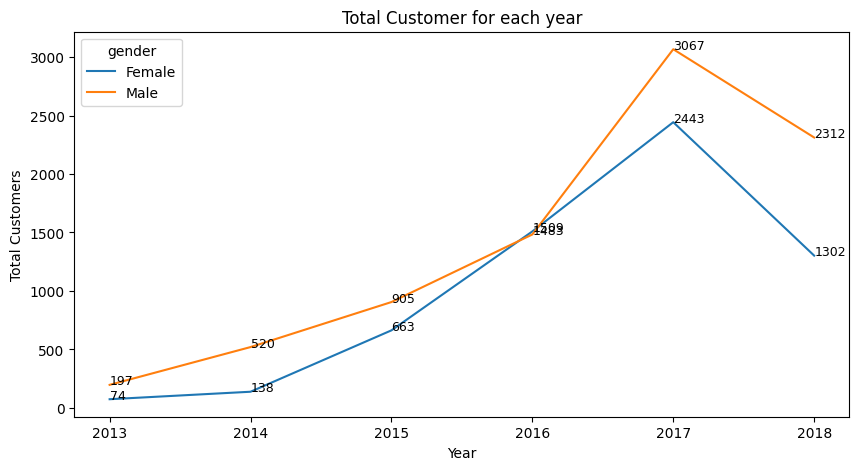

In [138]:
# checking distribution of the customer member date
fig = plt.figure(figsize=(10,5))

ax = sns.lineplot(data= yearly_cust, x='year_joined', y = 'total_customer', hue='gender')
ax.set_ylabel('Total Customers')
ax.set_xlabel('Year')

ax.set_title('Total Customer for each year')

for line in ax.lines:
    for x,y in zip(line.get_xdata(), line.get_ydata()):
        label = f"{y:.0f}"
        plt.text(x,y, label, fontsize = 9, ha = 'left')
        
plt.show()

In [139]:
# age group function
def age_group(x):
    if x in range(15):
        return 'Children'
    elif x > 14 and x <= 24:
        return 'Youth'
    elif x > 24 and x <= 65:
        return 'Adults'
    else:
        return 'Seniors'

In [140]:
cust['age_group'] = cust.apply(lambda x: age_group(x['age']), axis = 1)

In [141]:
cust

,customer_id,gender,age,income,became_member,year_joined,age_group
0,0610b486422d4921ae7d2bf64640c50b,Female,55,112000.0,2017-07-15,2017,Adults
1,78afa995795e4d85b5d9ceeca43f5fef,Female,75,100000.0,2017-05-09,2017,Seniors
2,e2127556f4f64592b11af22de27a7932,Male,68,70000.0,2018-04-26,2018,Seniors
3,389bc3fa690240e798340f5a15918d5c,Male,65,53000.0,2018-02-09,2018,Adults
4,2eeac8d8feae4a8cad5a6af0499a211d,Male,58,51000.0,2017-11-11,2017,Adults
...,...,...,...,...,...,...,...
14608,6d5f3a774f3d4714ab0c092238f3a1d7,Female,45,54000.0,2018-06-04,2018,Adults
14609,2cb4f97358b841b9a9773a7aa05a9d77,Male,61,72000.0,2018-07-13,2018,Adults
14610,01d26f638c274aa0b965d24cefe3183f,Male,49,73000.0,2017-01-26,2017,Adults
14611,9dc1421481194dcd9400aec7c9ae6366,Female,83,50000.0,2016-03-07,2016,Seniors


In [142]:
age_count = cust.groupby('age_group')['customer_id'].count().reset_index()
age_count

,age_group,customer_id
0,Adults,9816
1,Seniors,3930
2,Youth,867


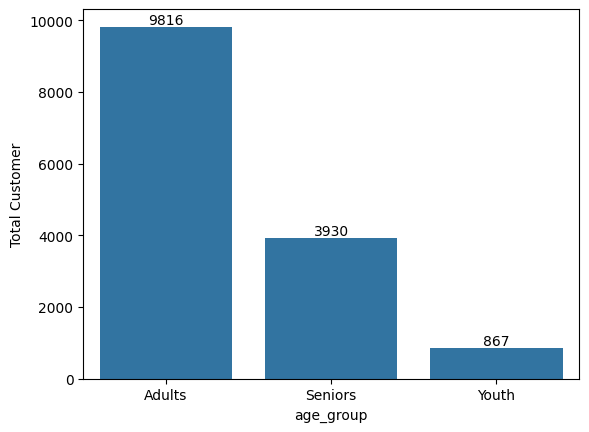

In [143]:
ax = sns.barplot(data=age_count,x = 'age_group', y= 'customer_id')
ax.set_ylabel('Total Customer')

for i in ax.containers:
    ax.bar_label(i,)

## Event Table

In [144]:
display(event.event.unique())
event.sample(10)

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

,customer_id,event,value,time
94490,75f49e85136b4cca9ea20521d183c9e9,transaction,{'amount': 2.34},246
71262,36329ff7770243fbbec5a8f2c3600494,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,174
140634,24bfa125f2ba493f9b5f7abacc83f796,transaction,{'amount': 7.5600000000000005},372
20087,eda12f036f2a467bb1cc0f3fb26c8847,transaction,{'amount': 1.34},12
239097,596e79d7f6734196acb386c83f768e04,transaction,{'amount': 12.55},552
125445,2abf5b9e31404a1aacb919cf7ce3d1a3,transaction,{'amount': 7.11},336
274472,fb49cd007a49481c939453026dd017e4,transaction,{'amount': 11.27},600
73875,a55f29feac844829b2a1cac47f88a6e9,transaction,{'amount': 0.52},180
81259,fa75661c3aa848ea9090b77c9ecf37b6,transaction,{'amount': 2.17},198
218507,25b4b4120a1a4cb6b7c6bc929a419ba6,transaction,{'amount': 0.22},510


In [145]:
#extracting key and value from value column
event['key'] = event['value'].str.split(':').str.get(0).replace("{", '', regex=True).replace("'", '', regex=True)
event['value'] = event['value'].str.split(':').str.get(1).replace("}", '', regex=True).replace("'", '', regex=True).replace(', reward', '',regex = True)
event

,customer_id,event,value,time,key
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,offer id
1,a03223e636434f42ac4c3df47e8bac43,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,offer id
2,e2127556f4f64592b11af22de27a7932,offer received,2906b810c7d4411798c6938adc9daaa5,0,offer id
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,fafdcd668e3743c1bb461111dcafc2a4,0,offer id
4,68617ca6246f4fbc85e91a2a49552598,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0,0,offer id
...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,1.5899999999999999,714,amount
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,9.53,714,amount
306531,a00058cf10334a308c68e7631c529907,transaction,3.61,714,amount
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,3.5300000000000002,714,amount


In [146]:
event = event.sort_values(by=['customer_id', 'time'], ascending=[True, True]).reset_index(drop= True)

In [147]:
event['day'] = event.time/24
event['day']= event['day'].astype('int64')

In [148]:
event.day.value_counts().sort_index()

day
0     22297
1      7199
2      6044
3      5239
4      4651
5      4071
6      3673
7     24038
8      8078
9      6814
10     5596
11     4935
12     4316
13     3877
14    24396
15     8351
16     7021
17    26667
18     9873
19     7907
20     6527
21    26272
22     9522
23     7758
24    26658
25    10005
26     7930
27     6610
28     5590
29     4619
Name: count, dtype: int64

In [149]:
#helper column
event['customer_log'] = (event['customer_id'] != event['customer_id'].shift(1)).astype(int)

# Create the sequential transaction order that reset at each customer change
event['activity_log'] = event['customer_log'].cumsum()

# Assign rank within each customer segment
event['activity_log'] = event.groupby('activity_log').cumcount() + 1

#drop the customer log
event.drop('customer_log', axis =1 , inplace=True)

In [150]:
def customer_group(x) -> object:
    if x in range(0,10):
        return 'group 1'
    elif x in range(10, 20):
        return 'group 2'
    elif x in range(20,30):
        return 'group 3'

In [151]:
#to fill the customer group
event['customer_group'] = event.apply(lambda row: customer_group(row['day']), axis=1)

#to fill the next null value based on the group they are included
event['customer_group'] = event['customer_group'].ffill(axis=0)

In [152]:
#checking the data is correctly placed
event.loc[(event['customer_group']=='group 3')]

,customer_id,event,value,time,key,day,activity_log,customer_group
9,0009655768c64bdeb2e877511632db8f,offer received,fafdcd668e3743c1bb461111dcafc2a4,504,offer id,21,10,group 3
10,0009655768c64bdeb2e877511632db8f,transaction,14.11,528,amount,22,11,group 3
11,0009655768c64bdeb2e877511632db8f,offer completed,fafdcd668e3743c1bb461111dcafc2a4,528,offer_id,22,12,group 3
12,0009655768c64bdeb2e877511632db8f,offer viewed,fafdcd668e3743c1bb461111dcafc2a4,540,offer id,22,13,group 3
13,0009655768c64bdeb2e877511632db8f,transaction,13.56,552,amount,23,14,group 3
...,...,...,...,...,...,...,...,...
306529,ffff82501cea40309d5fdd7edcca4a07,transaction,14.23,576,amount,24,29,group 3
306530,ffff82501cea40309d5fdd7edcca4a07,offer completed,2906b810c7d4411798c6938adc9daaa5,576,offer_id,24,30,group 3
306531,ffff82501cea40309d5fdd7edcca4a07,offer viewed,2906b810c7d4411798c6938adc9daaa5,582,offer id,24,31,group 3
306532,ffff82501cea40309d5fdd7edcca4a07,transaction,10.12,606,amount,25,32,group 3


Customer group is well placed, verified by day number above 20 equal to 'group 3'.

In [153]:
event.groupby('customer_group')['customer_id'].count()

customer_group
group 1     92104
group 2    102939
group 3    111491
Name: customer_id, dtype: int64

## Offer Table

In [154]:
offer

,offer_id,offer_type,difficulty,reward,duration,channels
0,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,10,7,"['email', 'mobile', 'social']"
1,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,10,5,"['web', 'email', 'mobile', 'social']"
2,3f207df678b143eea3cee63160fa8bed,informational,0,0,4,"['web', 'email', 'mobile']"
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,5,7,"['web', 'email', 'mobile']"
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,20,5,10,"['web', 'email']"
5,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,7,3,7,"['web', 'email', 'mobile', 'social']"
6,fafdcd668e3743c1bb461111dcafc2a4,discount,10,2,10,"['web', 'email', 'mobile', 'social']"
7,5a8bc65990b245e5a138643cd4eb9837,informational,0,0,3,"['email', 'mobile', 'social']"
8,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,5,5,"['web', 'email', 'mobile', 'social']"
9,2906b810c7d4411798c6938adc9daaa5,discount,10,2,7,"['web', 'email', 'mobile']"


In [155]:
offer.rename(columns={
    'duration': 'day_to_complete',
    'difficulty': 'minimum_spend'
}, inplace=True)

In [156]:
offer['minimum_spend'] = offer.minimum_spend.astype(float)
offer['reward'] = offer.reward.astype(float)

In [157]:
offer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   offer_id         10 non-null     object 
 1   offer_type       10 non-null     object 
 2   minimum_spend    10 non-null     float64
 3   reward           10 non-null     float64
 4   day_to_complete  10 non-null     int64  
 5   channels         10 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 612.0+ bytes


# Business Analysis
1. How many reward offers were completed? Which offers had the highest completion rate?

2. How are customer demographics distributed? based on income and gender variables

3. Are there any demographic patterns in offer completion? 

4. How about the intention of completion? is the closer to promo expired, completion rate get better? (based on their customer group)

## 1. How many reward offers were completed? Which offers had the highest completion rate?

In [158]:
event.sample(10)

,customer_id,event,value,time,key,day,activity_log,customer_group
26402,166cb562db664b1b9058d8d12667697f,transaction,17.74,684,amount,28,15,group 3
168710,8cd0edcb3a6b44df9be5e7c8831a5c53,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,offer id,0,1,group 1
166764,8b70ca1f5f5a45bdac2ac2f990b71526,transaction,29.03,558,amount,23,15,group 3
194236,a14d4f2ec359464f8d4aeac17b755903,transaction,25.56,432,amount,18,14,group 2
106144,58e87f3a869142f592332fbdf0181869,offer completed,fafdcd668e3743c1bb461111dcafc2a4,378,offer_id,15,14,group 2
6470,05894078f0a84797a81049d3c3f04402,offer completed,fafdcd668e3743c1bb461111dcafc2a4,462,offer_id,19,12,group 2
149403,7d1f81064589437591e0bf7d9e794e30,transaction,5.01,288,amount,12,7,group 2
278826,e831b9708b8b4239b01a19853e354e97,transaction,12.55,204,amount,8,4,group 1
211453,af5f147000ff48199b012df26bf97e15,offer viewed,9b98b8c7a33c4b65b9aebfe6a799e6d9,420,offer id,17,8,group 2
231603,c09601de4f0e402ba6b6bf6d11106e6d,transaction,23.41,378,amount,15,4,group 2


In [159]:
cust_event = event[event['event'].isin(['offer received', 'offer completed'])].reset_index(drop = True)
cust_event

,customer_id,event,value,time,key,day,activity_log,customer_group
0,0009655768c64bdeb2e877511632db8f,offer received,5a8bc65990b245e5a138643cd4eb9837,168,offer id,7,1,group 1
1,0009655768c64bdeb2e877511632db8f,offer received,3f207df678b143eea3cee63160fa8bed,336,offer id,14,4,group 2
2,0009655768c64bdeb2e877511632db8f,offer received,f19421c1d4aa40978ebb69ca19b0e20d,408,offer id,17,6,group 2
3,0009655768c64bdeb2e877511632db8f,offer completed,f19421c1d4aa40978ebb69ca19b0e20d,414,offer_id,17,8,group 2
4,0009655768c64bdeb2e877511632db8f,offer received,fafdcd668e3743c1bb461111dcafc2a4,504,offer id,21,10,group 3
...,...,...,...,...,...,...,...,...
109851,ffff82501cea40309d5fdd7edcca4a07,offer completed,2906b810c7d4411798c6938adc9daaa5,414,offer_id,17,22,group 2
109852,ffff82501cea40309d5fdd7edcca4a07,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,504,offer id,21,24,group 3
109853,ffff82501cea40309d5fdd7edcca4a07,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,504,offer_id,21,26,group 3
109854,ffff82501cea40309d5fdd7edcca4a07,offer received,2906b810c7d4411798c6938adc9daaa5,576,offer id,24,28,group 3


In [160]:
cust_group = cust_event.groupby('event')['customer_id'].count().sort_index(ascending=False).reset_index()
cust_group.rename(columns={'customer_id':'total_id'},inplace=True)
cust_group

,event,total_id
0,offer received,76277
1,offer completed,33579


In [161]:
received = cust_group['total_id'].values[0]
completed = cust_group['total_id'].values[1]

conversion = round(completed/received,2)*100
display(conversion)

np.float64(44.0)

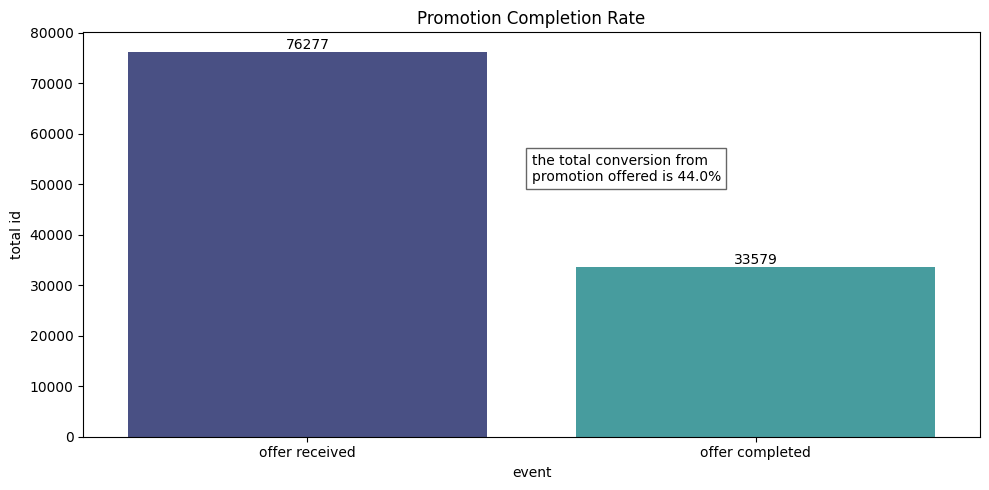

In [162]:
fig = plt.figure(figsize=(10,5))

ax = sns.barplot(x='event', y = 'total_id', data = cust_group,  hue = 'event', palette='mako')
ax.set_ylabel('total id')
ax.set_title('Promotion Completion Rate')

summary = f'the total conversion from\npromotion offered is {conversion}%'
ax.text(0.50, 0.70,  summary, transform = ax.transAxes,
        verticalalignment = 'top', bbox = dict(facecolor = 'white', alpha = 0.6))

for i in ax.containers:
    ax.bar_label(i,)

plt.tight_layout()
plt.show()

In [163]:
#get offer completed
complete = event[event['event']=='offer completed'].reset_index(drop=True)
complete.rename(columns={'value': 'offer_id'}, inplace=True)

#remove extra spaces
complete['offer_id'] = complete['offer_id'].str.strip()

#merge dataframe
complete_offer = pd.merge(complete, offer, how = 'inner', on = 'offer_id')

complete_offer

,customer_id,event,offer_id,time,key,day,activity_log,customer_group,offer_type,minimum_spend,reward,day_to_complete,channels
0,0009655768c64bdeb2e877511632db8f,offer completed,f19421c1d4aa40978ebb69ca19b0e20d,414,offer_id,17,8,group 2,bogo,5.0,5.0,5,"['web', 'email', 'mobile', 'social']"
1,0009655768c64bdeb2e877511632db8f,offer completed,fafdcd668e3743c1bb461111dcafc2a4,528,offer_id,22,12,group 3,discount,10.0,2.0,10,"['web', 'email', 'mobile', 'social']"
2,0009655768c64bdeb2e877511632db8f,offer completed,2906b810c7d4411798c6938adc9daaa5,576,offer_id,24,17,group 3,discount,10.0,2.0,7,"['web', 'email', 'mobile']"
3,0011e0d4e6b944f998e987f904e8c1e5,offer completed,2298d6c36e964ae4a3e7e9706d1fb8c2,252,offer_id,10,7,group 2,discount,7.0,3.0,7,"['web', 'email', 'mobile', 'social']"
4,0011e0d4e6b944f998e987f904e8c1e5,offer completed,0b1e1539f2cc45b7b9fa7c272da2e1d7,576,offer_id,24,15,group 3,discount,20.0,5.0,10,"['web', 'email']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33574,ffff82501cea40309d5fdd7edcca4a07,offer completed,0b1e1539f2cc45b7b9fa7c272da2e1d7,198,offer_id,8,10,group 1,discount,20.0,5.0,10,"['web', 'email']"
33575,ffff82501cea40309d5fdd7edcca4a07,offer completed,2906b810c7d4411798c6938adc9daaa5,384,offer_id,16,18,group 2,discount,10.0,2.0,7,"['web', 'email', 'mobile']"
33576,ffff82501cea40309d5fdd7edcca4a07,offer completed,2906b810c7d4411798c6938adc9daaa5,414,offer_id,17,22,group 2,discount,10.0,2.0,7,"['web', 'email', 'mobile']"
33577,ffff82501cea40309d5fdd7edcca4a07,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,504,offer_id,21,26,group 3,bogo,5.0,5.0,7,"['web', 'email', 'mobile']"


In [164]:
offer_cat = complete_offer.groupby('offer_type')['customer_id'].count().reset_index()

In [165]:
offer_cat

,offer_type,customer_id
0,bogo,15669
1,discount,17910


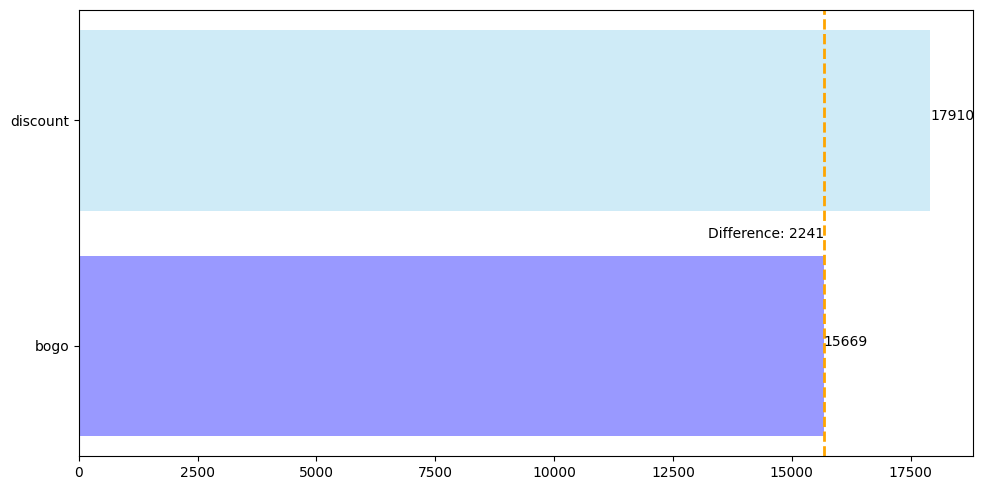

In [166]:
fig, ax = plt.subplots(figsize=(10,5))

#get difference
difference = offer_cat['customer_id'][1]-(offer_cat['customer_id'][1]-offer_cat['customer_id'][0])
difference_anot = (offer_cat['customer_id'][1]-offer_cat['customer_id'][0])

#set the bar horizontal
bar = ax.barh(offer_cat['offer_type'], offer_cat['customer_id'], color = ['blue', 'skyblue'], alpha = 0.4)

#set annotation
for index, value in enumerate(offer_cat['customer_id']):
    ax.text(value,index, str(value), fontsize = 10)
    
#get difference line
plt.axvline(difference, color = 'orange', ls = '--', lw = 2)
plt.text(difference, plt.gca().get_ylim()[1]*0.32, f'Difference: {difference_anot}',
         color = 'black', ha='right', fontsize = 10)



ax.grid(False)
plt.tight_layout()
plt.show()

> From the promotion offered, around 44% from offering get completed. and it seems discount offering may attract the customers more than the buy-one-get-one.

## 2. How are customer demographics distributed? based on income and gender variables

In [167]:
cust.sample(10)

,customer_id,gender,age,income,became_member,year_joined,age_group
449,662f3247f37c4ae7a2abb8f6e266a633,Male,25,53000.0,2017-10-21,2017,Adults
3322,5159b0aa366e4b9b9e55c737839bea23,Female,51,114000.0,2016-01-04,2016,Adults
2934,c5949a72f28a46b7a01ad99e98c20088,Male,66,35000.0,2018-04-16,2018,Seniors
7499,199a0cb9068941d5a520b891e0d1e9ae,Female,54,72000.0,2017-01-25,2017,Adults
4577,98c1b918a5ed47758c74bf3450b3dc2a,Female,48,56000.0,2017-10-08,2017,Adults
13751,e29d736de59d41ec94b7f0793e32eb5c,Male,38,59000.0,2017-12-28,2017,Adults
1949,4ba9515c05534f1b8852c0e5cd7c0ef9,Male,62,104000.0,2018-01-10,2018,Adults
11650,20efc9d4efc84eb89275621ccdfefea4,Male,42,55000.0,2016-04-22,2016,Adults
9885,e95473793bf441cb96dca619d37777ed,Female,48,84000.0,2018-03-08,2018,Adults
3513,d2fdc2be8ab64e4ba04830d441e53fd5,Female,101,99000.0,2015-05-26,2015,Seniors


In [168]:
display(cust.describe())
display(len(cust))

,age,income,became_member,year_joined
count,14613.000000,14613.000000,14613,14613.000000
mean,54.393417,65435.707931,2017-02-18 00:12:54.543215104,2016.618696
min,18.000000,30000.000000,2013-07-29 00:00:00,2013.000000
25%,42.000000,49000.000000,2016-05-19 00:00:00,2016.000000
50%,55.000000,64000.000000,2017-08-02 00:00:00,2017.000000
75%,66.000000,80000.000000,2017-12-30 00:00:00,2017.000000
max,101.000000,120000.000000,2018-07-26 00:00:00,2018.000000
std,17.400201,21633.524110,NaN,1.199147


14613

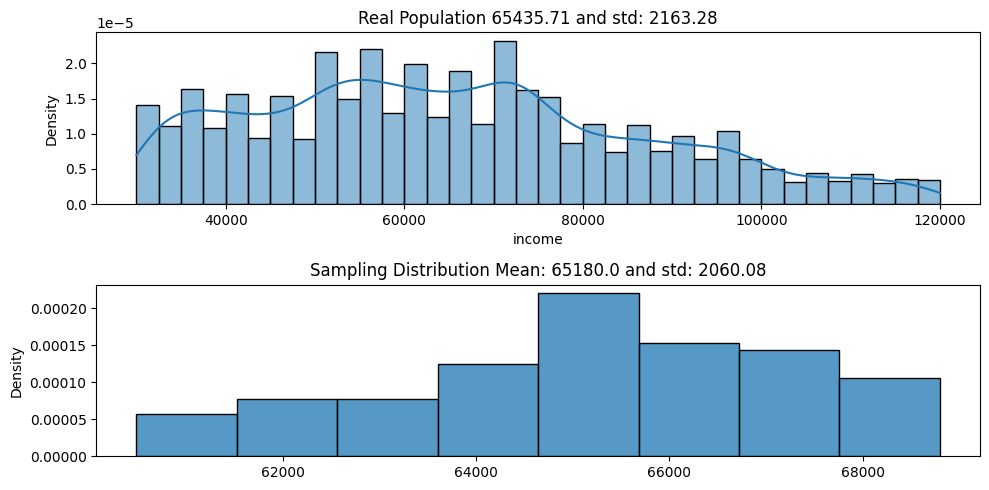

In [169]:
fig, axes = plt.subplots(2,1, figsize = (10,5))

#set sampling distribution variable
sample_size = 100
sample_mean = []

income_population = cust['income']


#real population
ax = sns.histplot(income_population, stat = 'density', ax = axes[0], kde=True)
ax.set_title(f'Real Population {round(np.mean(income_population),2)} and std: {round(np.std(income_population)/(sample_size**.5),2)}')


#sampling distribution
for i in range(sample_size):
    samp = np.random.choice(income_population, sample_size, replace = False)
    this_sample_mean = np.mean(samp)
    sample_mean.append(this_sample_mean)
    
ax1 = sns.histplot(sample_mean, stat='density', ax = axes[1])
ax1.set_title(f"Sampling Distribution Mean: {np.mean(sample_mean)} and std: {round(np.std(sample_mean),2)}")

plt.tight_layout()
plt.show()

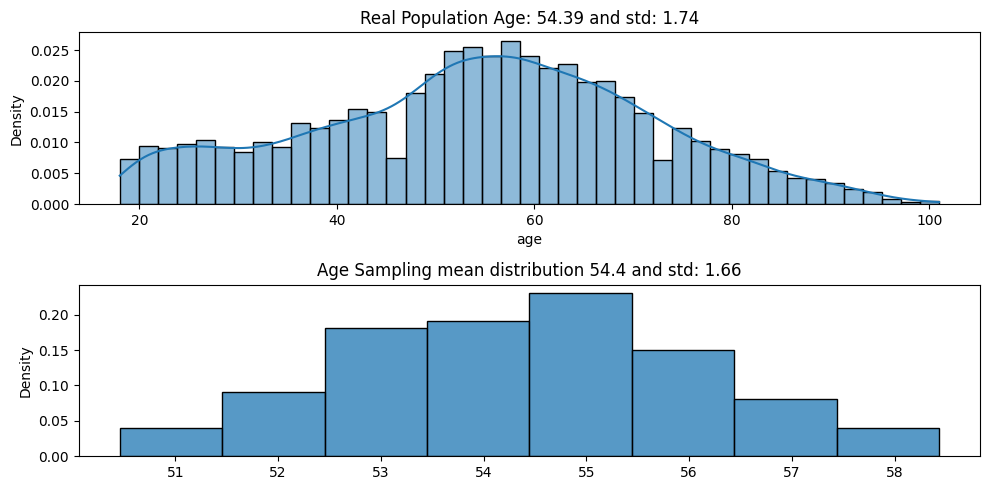

In [170]:
fig, axes = plt.subplots(2,1, figsize = (10,5))

#set sample distribution variable
sample_size = 100
sample_mean = []

age_population = cust['age']

#real population
ax = sns.histplot(age_population, stat='density', ax = axes[0], kde = True)
ax.set_title(f'Real Population Age: {round(np.mean(age_population),2)} and std: {round(np.std(age_population)/(sample_size**.5),2)}')


#sample distribution mean
for i in range(sample_size):
    samp = np.random.choice(age_population, sample_size, replace= False)
    this_sample_mean = np.mean(samp)
    sample_mean.append(this_sample_mean)

ax1 = sns.histplot(sample_mean, stat= 'density', ax = axes[1])
ax1.set_title(f'Age Sampling mean distribution {round(np.mean(sample_mean),2)} and std: {round(np.std(sample_mean),2)}')

plt.tight_layout()
plt.show()

> for both Age and Income seems already normally distributed, by checking the CLT distribution, mean and standar deviation value is almost have no difference.

In [171]:
cust.sample(10)

,customer_id,gender,age,income,became_member,year_joined,age_group
10244,dd44e6a1f6f540298af26a842d134262,Male,22,31000.0,2018-02-11,2018,Youth
6367,7127e3ab3285454d8c8c512cbf1d4ad1,Male,40,67000.0,2014-05-29,2014,Adults
1109,04ec49d81d154a70b3f0d5f280da3756,Male,65,42000.0,2018-03-10,2018,Adults
13515,be65aa372ab442dca0774ec6f2d738af,Male,39,45000.0,2017-12-31,2017,Adults
709,0231c913a51e420783be6bdeb75aa842,Female,28,65000.0,2018-01-20,2018,Adults
14282,c2e92293563f471784aeb176661ed097,Female,52,64000.0,2018-03-19,2018,Adults
11230,cef16ae4af0347b0970481285954a0b1,Female,67,95000.0,2018-03-14,2018,Seniors
6327,c2bc9cc1972345da8d1ac71c83ae4b23,Female,60,96000.0,2018-01-29,2018,Adults
13394,f20859f19f1b4a3987af0b94db1c4cab,Male,24,56000.0,2017-02-20,2017,Youth
751,a4ebb3f91224451a93cb4597ca3ceb41,Female,43,47000.0,2018-03-16,2018,Adults


In [172]:
age_income = cust.groupby(['age_group', 'gender'])['customer_id'].count().reset_index()
age_income

,age_group,gender,customer_id
0,Adults,Female,3959
1,Adults,Male,5857
2,Seniors,Female,1932
3,Seniors,Male,1998
4,Youth,Female,238
5,Youth,Male,629


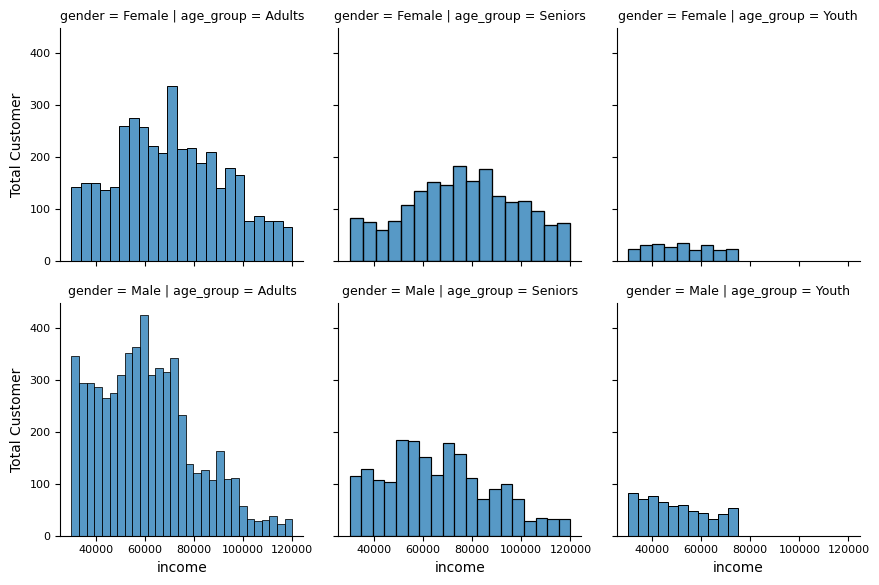

In [173]:
#set the canvas
g = sns.FacetGrid(cust, col='age_group', row = 'gender')
g.map(sns.histplot, 'income')

g.set_titles(size = 9)
g.set_ylabels('Total Customer')

for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), fontsize = 8)
    plt.setp(ax.get_yticklabels(), fontsize = 8)
    

plt.show()

> as depicted above, The majority age group is dominated by Adults Male then followed by the Female customer.

The proportion of the customer fall in Adults category within range of 54 y.o with average 65400 on income.

## 3. Are there any demographic patterns in offer completion? 

In [174]:
cust_log = pd.merge(cust, event, on = 'customer_id', how = 'inner')
cust_log

,customer_id,gender,age,income,became_member,year_joined,age_group,event,value,time,key,day,activity_log,customer_group
0,0610b486422d4921ae7d2bf64640c50b,Female,55,112000.0,2017-07-15,2017,Adults,transaction,21.51,18,amount,0,1,group 1
1,0610b486422d4921ae7d2bf64640c50b,Female,55,112000.0,2017-07-15,2017,Adults,transaction,32.28,144,amount,6,2,group 1
2,0610b486422d4921ae7d2bf64640c50b,Female,55,112000.0,2017-07-15,2017,Adults,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,408,offer id,17,3,group 2
3,0610b486422d4921ae7d2bf64640c50b,Female,55,112000.0,2017-07-15,2017,Adults,offer received,3f207df678b143eea3cee63160fa8bed,504,offer id,21,4,group 3
4,0610b486422d4921ae7d2bf64640c50b,Female,55,112000.0,2017-07-15,2017,Adults,transaction,23.22,528,amount,22,5,group 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268786,e4052622e5ba45a8b96b59aba68cf068,Female,62,82000.0,2017-07-22,2017,Adults,offer completed,f19421c1d4aa40978ebb69ca19b0e20d,480,offer_id,20,10,group 3
268787,e4052622e5ba45a8b96b59aba68cf068,Female,62,82000.0,2017-07-22,2017,Adults,transaction,19.47,486,amount,20,11,group 3
268788,e4052622e5ba45a8b96b59aba68cf068,Female,62,82000.0,2017-07-22,2017,Adults,offer viewed,f19421c1d4aa40978ebb69ca19b0e20d,546,offer id,22,12,group 3
268789,e4052622e5ba45a8b96b59aba68cf068,Female,62,82000.0,2017-07-22,2017,Adults,offer received,3f207df678b143eea3cee63160fa8bed,576,offer id,24,13,group 3


### 3.1 Income vs Total Transaction Made

In [175]:
cust_transaction = cust_log[cust_log['event']=='transaction'][['customer_id', 'income', 'value']]
cust_transaction['value'] = cust_transaction['value'].astype(float)
cust_transaction_value = cust_transaction.groupby(['customer_id','income'])['value'].sum().reset_index()
cust_transaction_value

,customer_id,income,value
0,0009655768c64bdeb2e877511632db8f,72000.0,127.60
1,0020c2b971eb4e9188eac86d93036a77,90000.0,196.86
2,0020ccbbb6d84e358d3414a3ff76cffd,60000.0,154.05
3,003d66b6608740288d6cc97a6903f4f0,73000.0,48.34
4,00426fe3ffde4c6b9cb9ad6d077a13ea,65000.0,68.51
...,...,...,...
14283,fff3ba4757bd42088c044ca26d73817a,83000.0,580.98
14284,fff7576017104bcc8677a8d63322b5e1,73000.0,29.94
14285,fff8957ea8b240a6b5e634b6ee8eafcf,56000.0,12.15
14286,fffad4f4828548d1b5583907f2e9906b,34000.0,88.83


<Axes: xlabel='income', ylabel='value'>

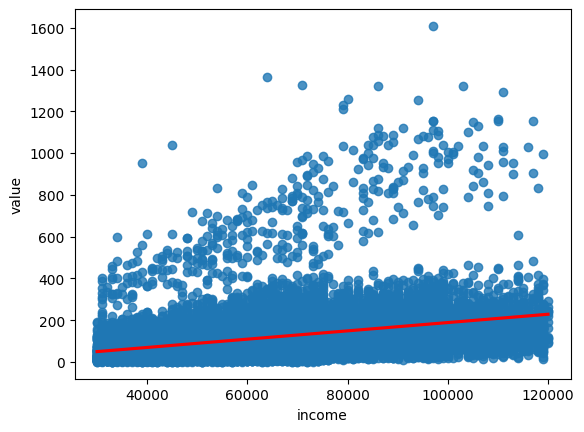

In [176]:
sns.regplot(data = cust_transaction_value, x = 'income', y ='value', line_kws={"color": "red"})

In [177]:
corr_income_value, p_value = pearsonr(cust_transaction_value.income, cust_transaction_value.value)

print(f'The correlation value is: {round(corr_income_value,2)}')

The correlation value is: 0.33


> if observing by correlation value, income and transaction made didn't highly correlated, which indicating no significant factor of customer spending based on their total income.

### 3.2 Gender vs Total Transaction

In [178]:
gender_trx = cust_log.loc[cust_log['event']=='transaction'][['customer_id','gender', 'age_group','value']].reset_index(drop = True)
gender_trx['value'] = gender_trx['value'].astype(float)
gender_trx = gender_trx.groupby(['customer_id', 'gender', 'age_group'])['value'].sum().reset_index()
gender_trx

,customer_id,gender,age_group,value
0,0009655768c64bdeb2e877511632db8f,Male,Adults,127.60
1,0020c2b971eb4e9188eac86d93036a77,Female,Adults,196.86
2,0020ccbbb6d84e358d3414a3ff76cffd,Female,Youth,154.05
3,003d66b6608740288d6cc97a6903f4f0,Female,Adults,48.34
4,00426fe3ffde4c6b9cb9ad6d077a13ea,Female,Youth,68.51
...,...,...,...,...
14283,fff3ba4757bd42088c044ca26d73817a,Female,Seniors,580.98
14284,fff7576017104bcc8677a8d63322b5e1,Male,Seniors,29.94
14285,fff8957ea8b240a6b5e634b6ee8eafcf,Male,Seniors,12.15
14286,fffad4f4828548d1b5583907f2e9906b,Male,Adults,88.83


In [179]:
cust_log_gender = gender_trx.groupby(['age_group','gender'])['value'].sum().reset_index()

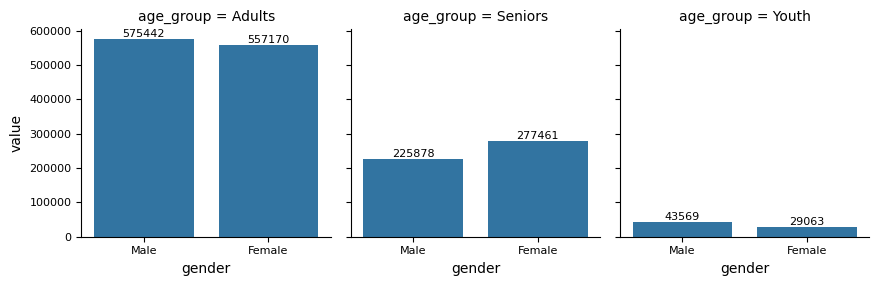

In [180]:
g = sns.FacetGrid(cust_log_gender, col = 'age_group', margin_titles=True)
g.map(sns.barplot, 'gender', 'value', order = ['Male', 'Female'])

for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), fontsize = 8)
    plt.setp(ax.get_yticklabels(), fontsize = 8)
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width()/2.,
            height,
            f'{int(height)}',
            ha = 'center',
            va = 'bottom',
            fontsize = 8
        )

plt.show()

> for detail transaction amongs the age group, we may see that each age group & gender has its own variance for total transaction made
- Adults: Male total transaction amount over higher than Female customer
- Seniors: Female total transaction amount higher than Male customer
- Youth: Male total transaction amount higher than Female customer

### 3.3 Gender vs Offer Completion

In [181]:
cust_log_complete = cust_log[cust_log.event=='offer completed'][['customer_id', 'gender', 'age_group', 'value', 'customer_group']]

cust_log_complete = cust_log_complete.groupby(['customer_id','gender', 'age_group', 'customer_group','value']).count().reset_index()

cust_log_complete['value'] = cust_log_complete['value'].str.strip()

#join with the offer table
cust_log_complete = pd.merge(cust_log_complete, offer, left_on = 'value', right_on='offer_id', how = 'inner')

cust_log_complete = cust_log_complete[['customer_id', 'gender', 'age_group','offer_type']]

cust_log_complete

,customer_id,gender,age_group,offer_type
0,0009655768c64bdeb2e877511632db8f,Male,Adults,bogo
1,0009655768c64bdeb2e877511632db8f,Male,Adults,discount
2,0009655768c64bdeb2e877511632db8f,Male,Adults,discount
3,0020c2b971eb4e9188eac86d93036a77,Female,Adults,discount
4,0020c2b971eb4e9188eac86d93036a77,Female,Adults,bogo
...,...,...,...,...
30624,ffff82501cea40309d5fdd7edcca4a07,Female,Adults,discount
30625,ffff82501cea40309d5fdd7edcca4a07,Female,Adults,discount
30626,ffff82501cea40309d5fdd7edcca4a07,Female,Adults,discount
30627,ffff82501cea40309d5fdd7edcca4a07,Female,Adults,discount


/Users/nandaputra/Documents/Veez Code/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


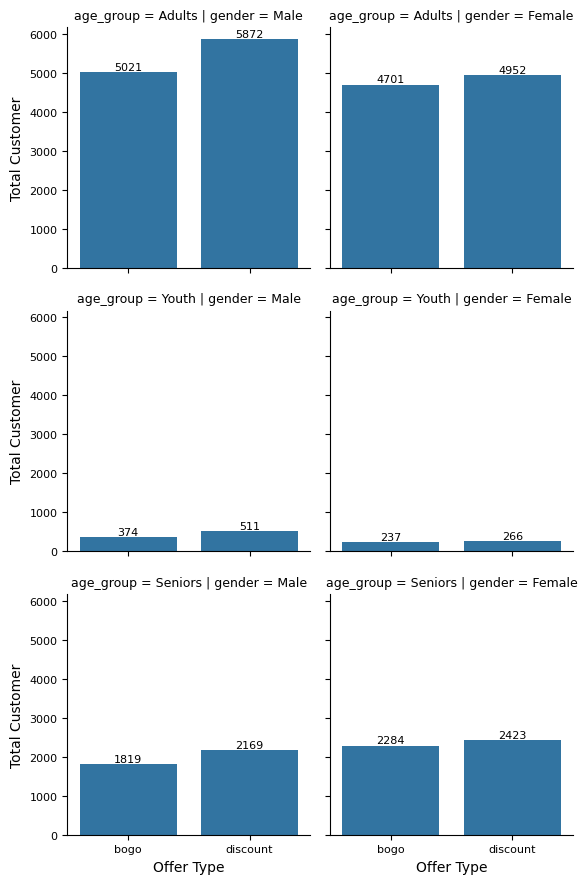

In [182]:
g = sns.FacetGrid(cust_log_complete, col='gender', row = 'age_group')
g.map(sns.countplot, 'offer_type')

g.set_titles(size = 9)
g.set_ylabels('Total Customer')
g.set_xlabels('Offer Type')
    
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), fontsize = 8)
    plt.setp(ax.get_yticklabels(), fontsize = 8)
    
    # Add labels to each bar
    for p in ax.patches:
        height = p.get_height()  # get the height of each bar
        ax.text(
            p.get_x() + p.get_width()/2.,  # X position of the text
            height,  # Y position of the text
            f'{int(height)}',  # The text (value) to add
            ha="center",  # Horizontal alignment
            va="bottom",  # Vertical alignment
            fontsize = 8
        )
    
plt.show()

> for each age group & gender, discount offer seems attract customer more instead the buy-one-get-one offering, from youth to seniors, the pattern pretty similar.

However, if we compare to the previous result, for the seniors age group validate that Female Seniors group generate more transaction than Male group. while the offering type still dominated by discount

## 4. How about the intention of completion? is the closer to promo expired, completion rate get better? (based on their customer group)

In [183]:
cust_log.sample(5)

,customer_id,gender,age,income,became_member,year_joined,age_group,event,value,time,key,day,activity_log,customer_group
180381,95c550f28bd04d17b531a0cfdb836c3a,Female,38,68000.0,2017-12-11,2017,Adults,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0,576,offer id,24,18,group 3
196541,4e921e366a964cd7a6ff3ea0513aa8e3,Female,53,94000.0,2017-11-13,2017,Adults,offer viewed,f19421c1d4aa40978ebb69ca19b0e20d,414,offer id,17,13,group 2
55597,e484a609dc02475bafa62e092505916f,Female,63,54000.0,2014-10-07,2014,Adults,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,504,offer id,21,9,group 3
135929,535af760b9b743618f3f7f3ff6bb770b,Male,48,56000.0,2013-11-09,2013,Adults,transaction,2.22,114,amount,4,6,group 1
58143,fd45aee3900f4b3c88a35b53d0bf630b,Female,63,65000.0,2018-03-28,2018,Adults,offer received,3f207df678b143eea3cee63160fa8bed,336,offer id,14,8,group 2


In [184]:
#filter out transaction
cust_log_offer = cust_log[~cust_log['event'].isin(['transaction', 'offer viewed'])  ][['customer_id', 'gender', 'income', 'year_joined', 'event', 'value', 'day', 'activity_log','age_group', 'customer_group']].reset_index(drop=True)
cust_log_offer_receive = cust_log_offer[cust_log_offer['event']=='offer received'].reset_index(drop=True)
cust_log_offer_complete = cust_log_offer[cust_log_offer['event']=='offer completed'].reset_index(drop=True)
cust_log_offer_receive

,customer_id,gender,income,year_joined,event,value,day,activity_log,age_group,customer_group
0,0610b486422d4921ae7d2bf64640c50b,Female,112000.0,2017,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,17,3,Adults,group 2
1,0610b486422d4921ae7d2bf64640c50b,Female,112000.0,2017,offer received,3f207df678b143eea3cee63160fa8bed,21,4,Adults,group 3
2,78afa995795e4d85b5d9ceeca43f5fef,Female,100000.0,2017,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,Seniors,group 1
3,78afa995795e4d85b5d9ceeca43f5fef,Female,100000.0,2017,offer received,5a8bc65990b245e5a138643cd4eb9837,7,6,Seniors,group 1
4,78afa995795e4d85b5d9ceeca43f5fef,Female,100000.0,2017,offer received,ae264e3637204a6fb9bb56bc8210ddfd,17,11,Seniors,group 2
...,...,...,...,...,...,...,...,...,...,...
65580,9dc1421481194dcd9400aec7c9ae6366,Female,50000.0,2016,offer received,ae264e3637204a6fb9bb56bc8210ddfd,24,17,Seniors,group 3
65581,e4052622e5ba45a8b96b59aba68cf068,Female,82000.0,2017,offer received,2298d6c36e964ae4a3e7e9706d1fb8c2,0,1,Adults,group 1
65582,e4052622e5ba45a8b96b59aba68cf068,Female,82000.0,2017,offer received,3f207df678b143eea3cee63160fa8bed,14,7,Adults,group 2
65583,e4052622e5ba45a8b96b59aba68cf068,Female,82000.0,2017,offer received,f19421c1d4aa40978ebb69ca19b0e20d,17,8,Adults,group 2


Customer group is predefined based on the received offer day
- group 1: day 0 - 10
- group 2: day 11 - 20
- group 3: day 21 - 30

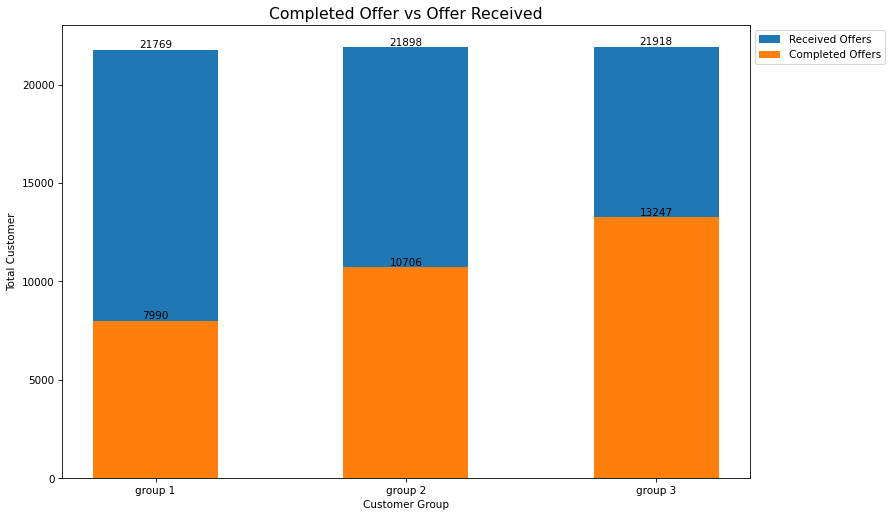

In [185]:
fig = plt.figure(figsize=(12,7), dpi = 75)
ax = plt.gca()

total_customer_receive = cust_log_offer_receive.groupby('customer_group').count().reset_index()
total_customer_complete = cust_log_offer_complete.groupby('customer_group').count().reset_index()

x = total_customer_receive['customer_group']  # common x-axis labels

# Plot side-by-side bar plots
ax.bar(x, total_customer_receive['customer_id'], width=0.5, label='Received Offers', align='center')
ax.bar(x, total_customer_complete['customer_id'], width=0.5, label='Completed Offers', align='center')

# Add labels to bars
for container in ax.containers:
    ax.bar_label(container)

ax.set_title('Completed Offer vs Offer Received', fontsize = 15)
ax.set_ylabel('Total Customer')
ax.set_xlabel('Customer Group')
ax.legend(bbox_to_anchor = (1,1),loc = 2)

plt.tight_layout()
plt.show()

> Based on the group category, we may see the closer promo period to end, the more transaction made by the customers with almost the same total offering number.

/Users/nandaputra/Documents/Veez Code/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


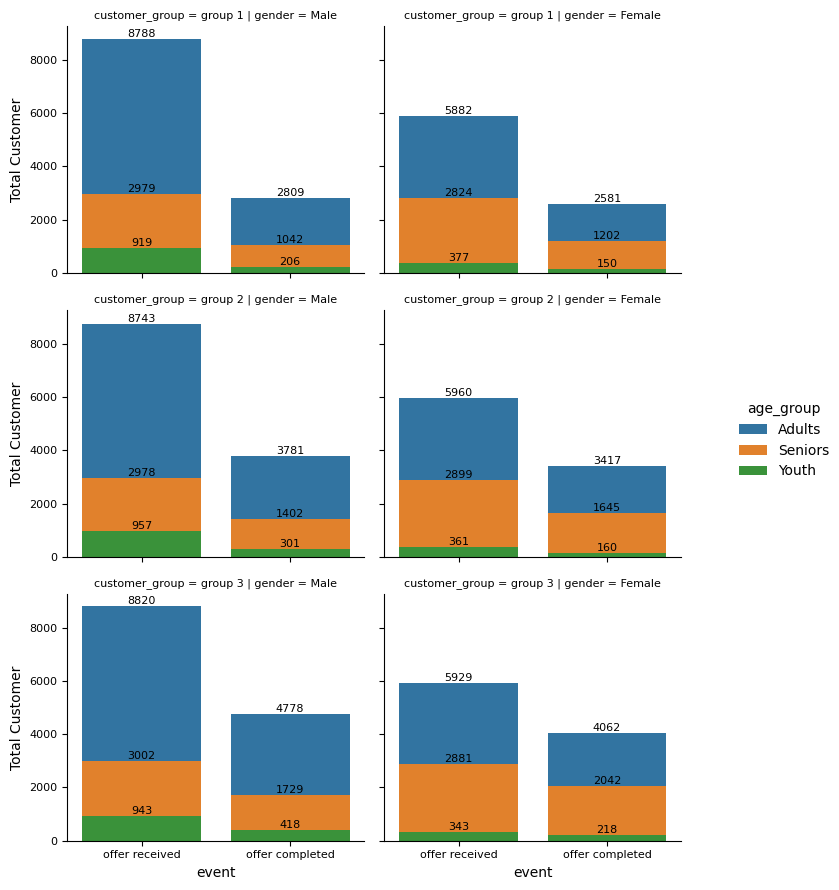

In [186]:
g = sns.FacetGrid(cust_log_offer, col = 'gender', row = 'customer_group', hue = 'age_group', row_order=['group 1', 'group 2', 'group 3'], col_order=['Male', 'Female'])
g.map(sns.countplot, 'event')

g.set_titles(size = 8)
g.set_ylabels('Total Customer')

for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), fontsize = 8)
    plt.setp(ax.get_yticklabels(), fontsize = 8)
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width()/2.,
            height,
            f'{int(height)}',
            ha = 'center',
            va = 'bottom',
            fontsize = 8
        )

#to add legend within the facet grid based hue category
g.add_legend()
g.legend.set_bbox_to_anchor((1.2,0.5))

plt.tight_layout()

In [187]:
#observe customer data
cust_log_offer

,customer_id,gender,income,year_joined,event,value,day,activity_log,age_group,customer_group
0,0610b486422d4921ae7d2bf64640c50b,Female,112000.0,2017,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,17,3,Adults,group 2
1,0610b486422d4921ae7d2bf64640c50b,Female,112000.0,2017,offer received,3f207df678b143eea3cee63160fa8bed,21,4,Adults,group 3
2,0610b486422d4921ae7d2bf64640c50b,Female,112000.0,2017,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,22,6,Adults,group 3
3,78afa995795e4d85b5d9ceeca43f5fef,Female,100000.0,2017,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,Seniors,group 1
4,78afa995795e4d85b5d9ceeca43f5fef,Female,100000.0,2017,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,4,Seniors,group 1
...,...,...,...,...,...,...,...,...,...,...
97523,e4052622e5ba45a8b96b59aba68cf068,Female,82000.0,2017,offer completed,2298d6c36e964ae4a3e7e9706d1fb8c2,2,4,Adults,group 1
97524,e4052622e5ba45a8b96b59aba68cf068,Female,82000.0,2017,offer received,3f207df678b143eea3cee63160fa8bed,14,7,Adults,group 2
97525,e4052622e5ba45a8b96b59aba68cf068,Female,82000.0,2017,offer received,f19421c1d4aa40978ebb69ca19b0e20d,17,8,Adults,group 2
97526,e4052622e5ba45a8b96b59aba68cf068,Female,82000.0,2017,offer completed,f19421c1d4aa40978ebb69ca19b0e20d,20,10,Adults,group 3


In [188]:
agg_cust = cust_log_offer.groupby(['gender','customer_group','event'])['customer_id'].count().reset_index()

#customer group
agg_cust_cust_group = agg_cust.pivot(index= ['gender', 'customer_group'], columns = 'event', values='customer_id').reset_index()
agg_cust_cust_group['completion_rate'] = round(agg_cust_cust_group['offer completed']/agg_cust_cust_group['offer received'],2)*100
agg_cust_cust_group = agg_cust_cust_group.sort_values('completion_rate', ascending=False).reset_index(drop=True)
display(agg_cust_cust_group)

event,gender,customer_group,offer completed,offer received,completion_rate
0,Female,group 3,6322,9153,69.0
1,Female,group 2,5222,9220,57.0
2,Male,group 3,6925,12765,54.0
3,Female,group 1,3933,9083,43.0
4,Male,group 2,5484,12678,43.0
5,Male,group 1,4057,12686,32.0


If we look even deeper, we may find that:
- the completion rate amongs the group and gender, Female & Group 3 (69%) and Female & Group 2 (57%) are the highest segment that can be targeted for next offering campaign, 
- followed by Male & Group 3 (54%)

In [189]:
agg_cust = cust_log_offer.groupby(['gender','customer_group','event','age_group'])['customer_id'].count().reset_index()

#age group
agg_cust_age_group = agg_cust.pivot(index= ['gender', 'customer_group','age_group'], columns = 'event', values='customer_id').reset_index()
agg_cust_age_group['completion_rate'] = round(agg_cust_age_group['offer completed']/agg_cust_age_group['offer received'],2)*100
agg_cust_age_group = agg_cust_age_group.sort_values('completion_rate', ascending=False).reset_index(drop=True)
display(agg_cust_age_group)

event,gender,customer_group,age_group,offer completed,offer received,completion_rate
0,Female,group 3,Seniors,2042,2881,71.0
1,Female,group 3,Adults,4062,5929,69.0
2,Female,group 3,Youth,218,343,64.0
3,Male,group 3,Seniors,1729,3002,58.0
4,Female,group 2,Adults,3417,5960,57.0
5,Female,group 2,Seniors,1645,2899,57.0
6,Male,group 3,Adults,4778,8820,54.0
7,Male,group 2,Seniors,1402,2978,47.0
8,Female,group 1,Adults,2581,5882,44.0
9,Male,group 3,Youth,418,943,44.0


> However, if we breakdown each segment of Gender, Customer Group & Age Group, we may have preliminary insight that:
- upon the offering promos, Female within the group 2 & group 3 (60%) maybe the best potential target for next activity, since we may implied that they are fear of missing out the opportunity of discount/bogo.
- In the other side, Male segement has less interest in complete the offer compare to the Female segment. However, we may synthesize that among the customer groups, Male Seniors & Adults within the 2nd and 3rd group are the potential one.


# Overall Summary

- From the total marketing promotion for 30 days period, total completion rate is around 44%, with discount much more preferably than buy-one-get-one offering overall.
- Majority age group is dominated by Adults Male then followed by the Female customer.
- The proportion of the customer fall in Adults category within range of 54 y.o with average 65400 on income.
- while checking the demogprahic pattern, customer's income doesn't neccesarily affecting the total transaction been made.
- Overall offering completion, discount offering is more preferably by the customers eventhough the difference not so big, but we may adjust the reward program on the discount instead bogo.
- Lastly, we can shift our targeted customer from male to female customers, as we saw that female customers more likely to complete the offer rather than male.

## Additional Notes:
This observation can be extended by examining from different aspects:
- customer retention by exploiring the total customer completion rate based on date join as member
- completion rate by numbers of offer given to customers group